In [1]:
# import libraries and some functions that are written for you 
from handwrite_functions import *

In [2]:
# where you want to save your dataset
dataset = 'MY_DATASET'
testset = 'MY_TESTSET'

# where you want to save the picture of your confusion matrix
savepic = "/Users/sierra/Downloads/confusionmatrix.png"

# where you put your image of a digit
load_mydigit = "/Users/sierra/Downloads/five_real.png"

In [3]:


transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# download training sets and test sets 
trainset = datasets.MNIST(dataset, download=True, train=True, transform=transform)
valset = datasets.MNIST(testset, download=True, train=False, transform=transform)

# load training sets and test sets in batch sizes of 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# prepare loaded data sets to iterate over
dataiter = iter(trainloader)
images, labels = next(dataiter)


# print shape of images - should be "[64, 1, 28, 28]"
print("images.shape: ", images.shape)
# print shape of labels - should be "[64]"
print("labels.shape: ", labels.shape)

# print number of images (we asked for 64 earlier), print number of pixels
print(f"\n\nNumber of images in batch: {images.shape[0]}  \nNumber of pixels in {images.shape[1]} image: [{images.shape[2]}, {images.shape[3]}]")

# then print number of labels in each batch - each image should have a label (the "truth" value) so we expect 64!
print(f"Number of labels in batch: {labels.shape[0]}")


images.shape:  torch.Size([64, 1, 28, 28])
labels.shape:  torch.Size([64])


Number of images in batch: 64  
Number of pixels in 1 image: [28, 28]
Number of labels in batch: 64


60 handwritten digits in the training set


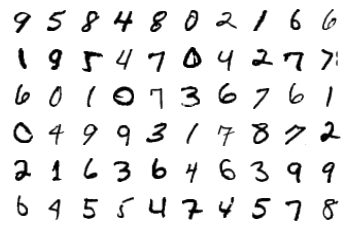

In [4]:
# can we print 60 of these digits in the training data?

print("60 handwritten digits in the training set")
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [5]:
# look at structure of neural network
# play with these values to make the NN better! 

# input number of neurons, two "hidden layers", output neuron size
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print("(0): Neurons")
print(model)

(0): Neurons
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [6]:
# this cell is complicated but essentially... 
# maximize the likelihood of observing the data by minimizing negative log-likelihood 
# we'll let pytorch do this for us! 

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [7]:
print('Before backward pass: \n', model[0].weight.grad)

# How much error does each output contribute? This function by pytorch
# starts at the output and propagates the error backwards to see which pathways
# (or output-> hidden layers -> input) contribute the most error
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0062,  0.0062,  0.0062,  ...,  0.0062,  0.0062,  0.0062],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0026,  0.0026,  0.0026,  ...,  0.0026,  0.0026,  0.0026],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014]])


In [8]:
# Luckily, this optimizer function with adjust the parameters to improve using last cell's information
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

# initializes the time to keep track of how long it takes to train
time0 = time()

# How many times do we want our neural network to learn on the same data?
# Be careful not to do it too many times, since otherwise the NN will learn the anomalies in our data
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Make the training data fit the same size as our given input size
        images = images.view(images.shape[0], -1)
    
        # train the neural network
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #backward propagate like in the last cell
        loss.backward()
        
        #have pytorch adjust to improve from backwards propagation
        optimizer.step()
        
        # store "loss.item()" or loss percentage in "running_loss" variable for us to print
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        
# print time it took to train
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6566338625146764
Epoch 1 - Training loss: 0.2891904866056783
Epoch 2 - Training loss: 0.2289136778046963
Epoch 3 - Training loss: 0.1863010669115192
Epoch 4 - Training loss: 0.15785637381139087
Epoch 5 - Training loss: 0.13502188042791158
Epoch 6 - Training loss: 0.11631988230814684
Epoch 7 - Training loss: 0.1028312721392954
Epoch 8 - Training loss: 0.09203805725004818
Epoch 9 - Training loss: 0.08447075627847457
Epoch 10 - Training loss: 0.07594567357546596
Epoch 11 - Training loss: 0.06852506249666468
Epoch 12 - Training loss: 0.06418829895893553
Epoch 13 - Training loss: 0.058687255064001694
Epoch 14 - Training loss: 0.05321891155681694

Training Time (in minutes) = 1.8664832949638366


Predicted Digit = 8
How sure?: 99.99 %
Original shape: torch.Size([1, 784])


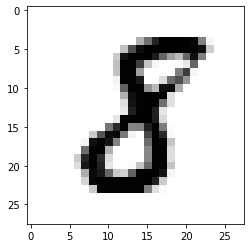

In [9]:
# let's test the trained NN on an image!

# pick image below
data_num = 44
images, labels = next(iter(valloader))
img = images[data_num].view(1, 784)
plt.imshow(images[data_num].numpy().squeeze(), cmap='gray_r')
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
print(f"How sure?: {max(probab) * 100:.4} %")
# Print out original shape and new shape
print(f"Original shape: {img.shape}")

In [10]:
# now, let's have the code automatically look through our "testing" dataset and let us know how many it gets right. 
y_test = []
predictions = []
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)


        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        predictions.append(pred_label)
        true_label = labels.numpy()[i]
        y_test.append(true_label)
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))



Number Of Images Tested = 10000

Model Accuracy = 0.976


In [11]:
# next step is to make a "confusion matrix"
# this shows us how "confused" or "confident" the neural network is for identifying each digit

# this function has been coded for you! 
confusion_matrix = comp_confmat(y_test, predictions)
print(confusion_matrix)

# the confusion matrix shows us how many "i"s it interpreted as "i", how many it interpreted as "i + 1"...
# so, the total should match the number of images in our testing data set 
print(np.sum(confusion_matrix))

[[9.580e+02 0.000e+00 1.000e+00 1.000e+00 0.000e+00 4.000e+00 9.000e+00
  2.000e+00 2.000e+00 3.000e+00]
 [0.000e+00 1.118e+03 2.000e+00 2.000e+00 0.000e+00 1.000e+00 4.000e+00
  2.000e+00 6.000e+00 0.000e+00]
 [3.000e+00 1.000e+00 1.008e+03 5.000e+00 1.000e+00 1.000e+00 3.000e+00
  6.000e+00 4.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 9.860e+02 1.000e+00 7.000e+00 0.000e+00
  4.000e+00 8.000e+00 3.000e+00]
 [0.000e+00 0.000e+00 5.000e+00 0.000e+00 9.480e+02 1.000e+00 6.000e+00
  5.000e+00 2.000e+00 1.500e+01]
 [2.000e+00 1.000e+00 0.000e+00 4.000e+00 2.000e+00 8.710e+02 5.000e+00
  0.000e+00 5.000e+00 2.000e+00]
 [2.000e+00 3.000e+00 0.000e+00 0.000e+00 1.000e+00 7.000e+00 9.400e+02
  0.000e+00 5.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 6.000e+00 5.000e+00 2.000e+00 1.000e+00 0.000e+00
  9.930e+02 2.000e+00 1.700e+01]
 [2.000e+00 0.000e+00 2.000e+00 3.000e+00 1.000e+00 4.000e+00 3.000e+00
  1.000e+00 9.570e+02 1.000e+00]
 [1.000e+00 2.000e+00 0.000e+00 7.000e+00 7.000e+00 3.0

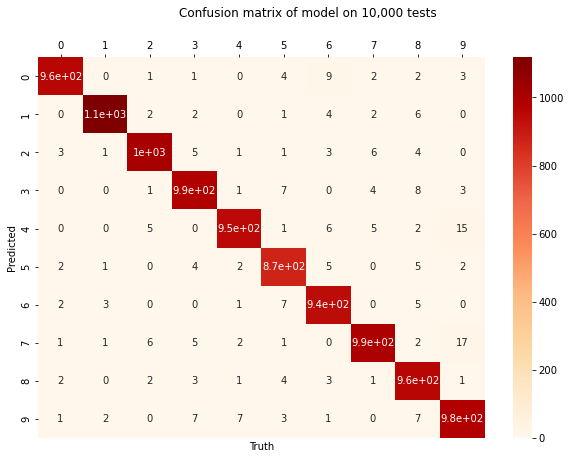

In [12]:
plot_confusion_matrix(confusion_matrix, savepic)

In [13]:
# save the model so you don't have to retrain the NN

torch.save(model, './my_mnist_model.pt') 

In [14]:
# load your custom image of a digit

custom_image_path = load_mydigit

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data to check if reading worked.

print("These are the shading (0 - 255) of each pixel")
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")



These are the shading (0 - 255) of each pixel
Custom image tensor:
tensor([[[211, 212, 211,  ..., 197, 197, 195],
         [209, 211, 209,  ..., 195, 195, 195],
         [206, 208, 207,  ..., 192, 193, 193],
         ...,
         [198, 196, 198,  ..., 194, 194, 193],
         [198, 197, 199,  ..., 194, 193, 193],
         [196, 195, 196,  ..., 193, 193, 193]],

        [[208, 209, 208,  ..., 194, 194, 192],
         [206, 208, 206,  ..., 192, 192, 192],
         [203, 205, 204,  ..., 189, 190, 190],
         ...,
         [195, 193, 195,  ..., 192, 192, 192],
         [194, 193, 195,  ..., 192, 192, 192],
         [192, 191, 192,  ..., 192, 192, 192]],

        [[201, 202, 201,  ..., 186, 186, 185],
         [199, 201, 199,  ..., 184, 184, 185],
         [196, 198, 197,  ..., 181, 182, 183],
         ...,
         [189, 187, 189,  ..., 187, 187, 187],
         [191, 190, 192,  ..., 187, 188, 188],
         [189, 188, 189,  ..., 187, 188, 188]],

        [[255, 255, 255,  ..., 255, 255

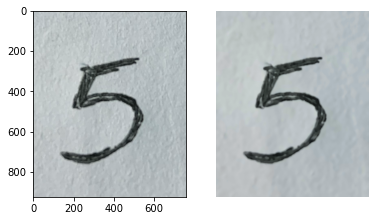

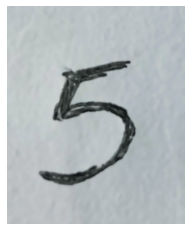

In [15]:
# want to "de-noise" your image? Try this after naming your "output_image_path"

output_image_path = "/Users/sierra/Downloads/five_denoise.png"
denoise_img(custom_image_path, output_image_path)

In [16]:
# Load in your custom image and convert the values to floats 
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide each pixel value by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Invert the colors so that the digit is black on a light background
custom_image = np.abs(custom_image - 1)

# Rount each pixel to 1 or 0 for maximum contrast!
custom_image = np.round(custom_image)
# Print out image data - does it look like the other one?
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0

In [17]:
# We need to make sure that the original image matches in shape, otherwise our NN will be confused
custom_image_transform = transforms.Compose([
    transforms.Resize((28, 28)), #MNIST only provides 28x28 so let's change ours to match
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([4, 924, 756])
New shape: torch.Size([4, 28, 28])


/Users/sierra/opt/anaconda3/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Predicted Digit = 5
How sure?: 83.45 %


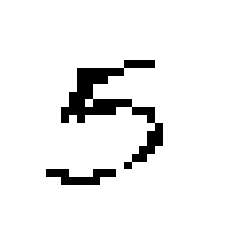

In [18]:
# load our image!
images, labels = next(iter(valloader))
img = custom_image_transformed[0].view(1, 784)

# plot our image as seen by torchvision
plt.imshow(custom_image_transformed[0].numpy().squeeze(), cmap='gray_r')
plt.axis(False);

# use our NN to test on our image
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
print(f"How sure?: {max(probab) * 100:.4} %")

In [19]:
# Just for fun, let's look at what the NN "thought" of other options.
for i in np.array(probab):
    print(f"{i * 100:.4}% digit could be {probab.index(i)}")
    
# Are there any that come close? Do you see why the NN could "think" it would be another digit?

1.333% digit could be 0
0.3735% digit could be 1
1.199% digit could be 2
3.49% digit could be 3
0.3316% digit could be 4
83.45% digit could be 5
2.768% digit could be 6
0.3861% digit could be 7
1.744% digit could be 8
4.926% digit could be 9
